In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(1280, 804, 3)
(800, 1500, 3)


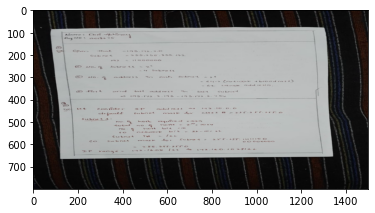

In [2]:
im_path = 'document.jpeg'
img = cv2.imread(im_path)
print(img.shape)

img = cv2.resize(img,(1500, 800))
print(img.shape)

plt.imshow(img)
plt.show()

* Remove the Noise
* Edge Detection
* Contour Extraction
* Best Contour Selection
* Project to the Screen

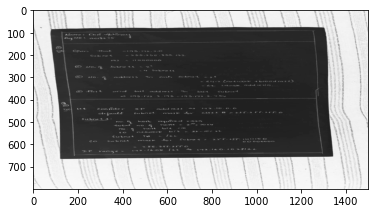

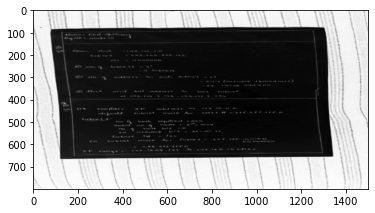

In [3]:
# Remove rhe Noise

## Image Bluring

orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'binary')
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred, cmap = 'binary')
plt.show()

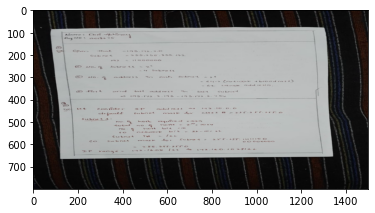

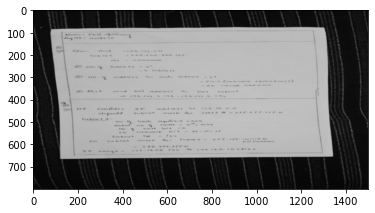

In [4]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

In [5]:
regen.shape

(800, 1500, 3)

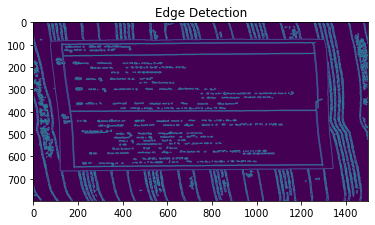

In [6]:
## Edge Detection

edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [7]:
## Countours Extraction

contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse=True, key = cv2.contourArea)

2926


In [8]:
# select the best Contour Region

for c in contours:
    p = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.02*p, True)
    
    if len(approx) == 4:
        target = approx
        break
        
print(target.shape)

(4, 1, 2)


In [9]:
## reorder target contour

def reorder(h):
    h = h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype = np.float32)
    
    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

In [10]:
reorder = reorder(target)
print('-------------')
print(reorder)

[[1306   84]
 [1341  654]
 [ 121  662]
 [  84   85]]
-------------
[[  84.   85.]
 [1306.   84.]
 [1341.  654.]
 [ 121.  662.]]


In [11]:
## project to the fixed screen

input_represent = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [12]:
M = cv2.getPerspectiveTransform(input_represent, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))

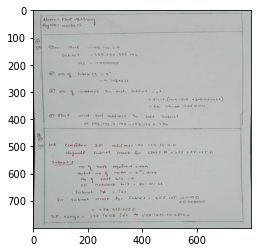

In [13]:
plt.imshow(ans)
plt.show()